In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import time

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

import statsmodels.discrete.discrete_model as sm


from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            precision_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            recall_score, roc_curve, 
                            roc_auc_score, 
                            make_scorer, plot_roc_curve)
import sklearn.metrics as metrics


In [146]:
df = pd.read_csv('./data/attributes.csv')
master = pd.read_csv('./data/master.csv')


In [147]:
master

,Unnamed: 0,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid,floor_sale_target,discount_target,premium_target
0,0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
1,1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,1,0,0
2,2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
3,3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
4,4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8419,Sold,2021-02-11,4041,0.0,20.00,34457,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1
8420,8420,Sold,2021-02-11,2306,4.0,125.00,217171,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1
8421,8421,Sold,2021-02-11,6784,1.0,130.00,224930,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1
8422,8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1


In [148]:
df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,...,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters
0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,0.03,...,0,0,0,0,0,0,0,0,1.883720e-06,39
1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,0.03,...,0,0,0,0,0,0,0,0,1.883720e-06,39
2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.330,0.03,...,0,0,0,0,0,0,0,0,6.797476e-07,57
3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.330,0.03,...,0,0,0,0,0,1,0,0,3.599134e-06,52
4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.330,0.03,...,0,0,0,0,0,0,0,0,9.281033e-05,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,Sold,2021-02-11,4041,0.0,20.00,34457,2.81,48.634911,15.245,5.84,...,0,0,0,0,0,0,0,0,2.832635e-05,38
8420,Sold,2021-02-11,2306,4.0,125.00,217171,2.81,48.634911,15.245,5.84,...,0,0,0,0,0,0,0,0,4.127739e-06,31
8421,Sold,2021-02-11,6784,1.0,130.00,224930,2.81,48.634911,15.245,5.84,...,0,0,0,0,0,0,1,0,4.778600e-07,31
8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,5.84,...,0,0,0,0,0,1,0,0,1.317699e-07,56


In [149]:
list(df.columns)

['tx_type',
 'date',
 'punk_id',
 'transfer_count',
 'eth_amount',
 'dollar_amount',
 'floor_price',
 'mean_offer',
 'median_offer',
 'min_sale_price',
 'min_bid',
 'mean_bid',
 'median_bid',
 'floor_sale_target',
 'discount_target',
 'premium_target',
 'total_attrs',
 'typerare',
 'attcount',
 'min',
 'avg',
 'rank',
 'female',
 'male',
 'alien',
 'ape',
 'zombie',
 'albino',
 'dark',
 'light',
 'mid',
 'zero_attrs',
 'one_attrs',
 'two_attrs',
 'three_attrs',
 'four_attrs',
 'five_attrs',
 'six_attrs',
 'seven_attrs',
 'cap_forward',
 'do-rag',
 'cap',
 'cowboy_hat',
 'headband',
 'bandana',
 'fedora',
 'goat',
 'police_cap',
 'spots',
 'hoodie',
 'gold_chain',
 'top_hat',
 'earring',
 'knitted_cap',
 'purple_hair',
 'front_beard_dark',
 'front_beard',
 'vampire_hair',
 'normal_beard_black',
 'shaved_head',
 'peak_spike',
 'luxurious_beard',
 'mole',
 'chinstrap',
 'wild_hair',
 'mustache',
 'normal_beard',
 'mohawk_thin',
 'shadow_beard',
 'mohawk_dark',
 'mohawk',
 'crazy_hair',
 '

In [150]:
# only want dummy variables 
attr_df = df[['punk_id','female',
 'male',
 'alien',
 'ape',
 'zombie',
 'albino',
 'dark',
 'light',
 'mid',
 'zero_attrs',
 'one_attrs',
 'two_attrs',
 'three_attrs',
 'four_attrs',
 'five_attrs',
 'six_attrs',
 'seven_attrs',
 'cap_forward',
 'do-rag',
 'cap',
 'cowboy_hat',
 'headband',
 'bandana',
 'fedora',
 'goat',
 'police_cap',
 'spots',
 'hoodie',
 'gold_chain',
 'top_hat',
 'earring',
 'knitted_cap',
 'purple_hair',
 'front_beard_dark',
 'front_beard',
 'vampire_hair',
 'normal_beard_black',
 'shaved_head',
 'peak_spike',
 'luxurious_beard',
 'mole',
 'chinstrap',
 'wild_hair',
 'mustache',
 'normal_beard',
 'mohawk_thin',
 'shadow_beard',
 'mohawk_dark',
 'mohawk',
 'crazy_hair',
 'stringy_hair',
 'frumpy_hair',
 'messy_hair',
 'handlebars',
 'rosy_cheeks',
 'choker',
 'pilot_helmet',
 'tiara',
 'orange_side',
 'beanie',
 'welding_goggles',
 'pigtails',
 'pink_with_hat',
 'blonde_short',
 'wild_white_hair',
 'straight_hair_blonde',
 'wild_blonde',
 'half_shaved',
 'blonde_bob',
 'red_mohawk',
 'clown_hair_green',
 'straight_hair_dark',
 'dark_hair',
 'silver_chain',
 'straight_hair',
 'medical_mask',
 'tassle_hat',
 'big_beard',
 'purple_eye_shadow',
 'blue_eye_shadow',
 'green_eye_shadow',
 'pipe',
 'vape',
 'muttonchops',
 'vr',
 'clown_nose',
 'clown_eyes_green',
 'clown_eyes_blue',
 '3d_glasses',
 'classic_shades',
 'regular_shades',
 'small_shades',
 'cigarette',
 'eye_patch',
 'nerd_glasses',
 'big_shades',
 'horned_rim_glasses',
 'buck_teeth',
 'hot_lipstick',
 'purple_lipstick',
 'black_lipstick',
 'frowm',
 'smile',
 'scarcity_score',
 'kmeans_clusters']]

In [151]:
# merge both dfs 
master = pd.merge(master, attr_df, left_on='punk_id', right_on='punk_id', how='left')
master

,Unnamed: 0,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,...,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters
0,0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,1.883720e-06,39
1,0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,1.883720e-06,39
2,1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,1.883720e-06,39
3,1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,1.883720e-06,39
4,2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,6.797476e-07,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27789,8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,...,0,0,0,0,0,1,0,0,1.317699e-07,56
27790,8423,Sold,2021-02-12,8215,1.0,6.25,11087,6.25,17.395714,10.750,...,0,0,0,0,0,0,0,0,3.840984e-06,52
27791,8423,Sold,2021-02-12,8215,1.0,6.25,11087,6.25,17.395714,10.750,...,0,0,0,0,0,0,0,0,3.840984e-06,52
27792,8423,Sold,2021-02-12,8215,1.0,6.25,11087,6.25,17.395714,10.750,...,0,0,0,0,0,0,0,0,3.840984e-06,52


In [152]:
# drop duplicates
master.drop_duplicates(inplace=True)
master.reset_index(inplace=True, drop=True)
master

,Unnamed: 0,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,...,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters
0,0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,1.883720e-06,39
1,1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,1.883720e-06,39
2,2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,6.797476e-07,57
3,3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.330,...,0,0,0,0,0,1,0,0,3.599134e-06,52
4,4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.330,...,0,0,0,0,0,0,0,0,9.281033e-05,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8419,Sold,2021-02-11,4041,0.0,20.00,34457,2.81,48.634911,15.245,...,0,0,0,0,0,0,0,0,2.832635e-05,38
8420,8420,Sold,2021-02-11,2306,4.0,125.00,217171,2.81,48.634911,15.245,...,0,0,0,0,0,0,0,0,4.127739e-06,31
8421,8421,Sold,2021-02-11,6784,1.0,130.00,224930,2.81,48.634911,15.245,...,0,0,0,0,0,0,1,0,4.778600e-07,31
8422,8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,...,0,0,0,0,0,1,0,0,1.317699e-07,56


In [153]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424 entries, 0 to 8423
Columns: 122 entries, Unnamed: 0 to kmeans_clusters
dtypes: float64(10), int64(110), object(2)
memory usage: 7.8+ MB


In [10]:
len(master['punk_id'].unique())

3808

In [11]:
list(master.columns)

['tx_type',
 'date',
 'punk_id',
 'transfer_count',
 'eth_amount',
 'dollar_amount',
 'floor_price',
 'mean_offer',
 'median_offer',
 'min_sale_price',
 'floor_sale_target',
 'discount_target',
 'premium_target',
 '30_day_MA',
 'above_30_day',
 'female',
 'male',
 'alien',
 'ape',
 'zombie',
 'albino',
 'dark',
 'light',
 'mid',
 'zero_attrs',
 'one_attrs',
 'two_attrs',
 'three_attrs',
 'four_attrs',
 'five_attrs',
 'six_attrs',
 'seven_attrs',
 'cap_forward',
 'do-rag',
 'cap',
 'cowboy_hat',
 'headband',
 'bandana',
 'fedora',
 'goat',
 'police_cap',
 'spots',
 'hoodie',
 'gold_chain',
 'top_hat',
 'earring',
 'knitted_cap',
 'purple_hair',
 'front_beard_dark',
 'front_beard',
 'vampire_hair',
 'normal_beard_black',
 'shaved_head',
 'peak_spike',
 'luxurious_beard',
 'mole',
 'chinstrap',
 'wild_hair',
 'mustache',
 'normal_beard',
 'mohawk_thin',
 'shadow_beard',
 'mohawk_dark',
 'mohawk',
 'crazy_hair',
 'stringy_hair',
 'frumpy_hair',
 'messy_hair',
 'handlebars',
 'rosy_cheeks',

In [12]:
list(master.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
master.shape

(8024, 120)

## Functions 

In [14]:
# Courtesy of Emily Naftalin 

feat_dict = {'female':'female','male':'male', 'alien':'alien', 'ape':'ape', 'zombie':'zombie', 'albino':'albino', 'dark':'dark', 'light':'light',
 'mid':'mid', 'zero_attrs':'zero_attrs', 'one_attrs':'one_attrs', 'two_attrs':'two_attrs', 'three_attrs':'three_attrs', 'four_attrs':'four_attrs',
 'five_attrs':'five_attrs', 'six_attrs':'six_attrs', 'seven_attrs':'seven_attrs', 'scarcity_score':'scarcity_score', 'cap_forward':'cap_forward',
 'do-rag':'do-rag', 'cap':'cap', 'cowboy_hat':'cowboy_hat','headband':'headband', 'bandana':'bandana', 'fedora':'fedora', 'goat':'goat', 'police_cap':'police_cap', 'spots':'spots',
 'hoodie':'hoodie', 'gold_chain':'gold_chain', 'top_hat':'top_hat', 'earring':'earring', 'knitted_cap':'knitted_cap', 'purple_hair':'purple_hair', 'front_beard_dark':'front_beard_dark',
 'front_beard':'front_beard', 'vampire_hair':'vampire_hair', 'normal_beard_black':'normal_beard_black', 'shaved_head':'shaved_head', 'peak_spike':'peak_spike', 'luxurious_beard':'luxurious_beard',
 'mole':'mole', 'chinstrap':'chinstrap','wild_hair':'wild_hair', 'mustache':'mustache', 'normal_beard':'normal_beard', 'mohawk_thin':'mohawk_thin', 'shadow_beard':'shadow_beard', 'mohawk_dark':'mohawk_dark',
 'mohawk':'mohawk', 'crazy_hair':'crazy_hair', 'stringy_hair':'stringy_hair', 'frumpy_hair':'frumpy_hair', 'messy_hair':'messy_hair', 'handlebars':'handlebars', 'rosy_cheeks':'rosy_cheeks', 'choker':'choker', 'pilot_helmet':'pilot_helmet',
 'tiara':'tiara', 'orange_side':'orange_side','beanie':'beanie', 'welding_goggles':'welding_goggles', 'pigtails':'pigtails','pink_with_hat':'pink_with_hat', 'blonde_short':'blonde_short','wild_white_hair':'wild_white_hair', 'straight_hair_blonde':'straight_hair_blonde',
'wild_blonde':'wild_blonde', 'half_shaved':'half_shaved', 'blonde_bob':'blonde_bob', 'red_mohawk':'red_mohawk', 'clown_hair_green':'clown_hair_green', 'straight_hair_dark':'straight_hair_dark', 'dark_hair':'dark_hair',
 'silver_chain':'silver_chain', 'straight_hair':'straight_hair', 'medical_mask':'medical_mask', 'tassle_hat':'tassle_hat', 'big_beard':'big_beard', 'purple_eye_shadow':'purple_eye_shadow', 'blue_eye_shadow':'blue_eye_shadow',
 'green_eye_shadow':'green_eye_shadow', 'pipe':'pipe', 'vape':'vape', 'muttonchops':'muttonchops', 'vr':'vr', 'clown_nose':'clown_nose', 'clown_eyes_green':'clown_eyes_green', 'clown_eyes_blue':'clown_eyes_blue',
 '3d_glasses':'3d_glasses', 'classic_shades':'classic_shades', 'regular_shades':'regular_shades','small_shades':'small_shades', 'cigarette':'cigarette', 'eye_patch':'eye_patch', 'nerd_glasses':'nerd_glasses',
 'big_shades':'big_shades', 'horned_rim_glasses':'horned_rim_glasses', 'buck_teeth':'buck_teeth', 'hot_lipstick':'hot_lipstick', 'purple_lipstick':'purple_lipstick', 'black_lipstick':'black_lipstick', 'frowm':'frowm', 'smile':'smile'}

font_title = {'family': 'roboto',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 23,
        }

font_dict = {'family': 'roboto',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 13,
        }

def plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, target):
    '''Plots important features in barchart'''
#     box = dict(pad=5, alpha=0.2)
    
    y_pos = np.arange(len(negative_coeffs))
    x_pos = 1
    
    pairs_pos = [(a,b) for a,b in zip(positive_coeffs, positive_features)]
    pairs_pos = sorted(pairs_pos, key=lambda x: x[0])
    
    pairs_neg = [(a,b) for a,b in zip(negative_coeffs, negative_features)]
    pairs_neg = sorted(pairs_neg, key=lambda x: x[0], reverse=True)
    
    positive_coeffs = [a[0] for a in pairs_pos]
    positive_features = [a[1] for a in pairs_pos]
    
    negative_coeffs = [a[0] for a in pairs_neg]
    negative_features = [a[1] for a in pairs_neg]
    
    x_ticks_pos = np.linspace(0, round(max(positive_coeffs), 1), 3)
    x_ticks_neg = np.linspace(round(min(negative_coeffs), 1), 0, 3)
    
#     x_ticks_neg = np.linspace(((round(max(max(positive_coeffs), min(negative_coeffs)*-1))*-1), 1), 0, 3)
#     x_ticks_pos = np.linspace(0, (round(max(max(positive_coeffs), min(negative_coeffs)*-1)), 1), 3)
    
    fig = plt.figure(figsize=(10,4))
    
    negs = [feat_dict.get(f, None) for f in negative_features]
    poss = [feat_dict.get(f, None) for f in positive_features]
    
    ax = plt.subplot(121)
    plt.barh(y_pos, negative_coeffs, align='center', alpha=0.7, color='#697D90')
#     plt.title(f'{target} Less Likely', fontdict=font_dict)
    plt.title('Less Likely', fontdict=font_dict)
    plt.xticks(x_ticks_neg,rotation = '25')
    plt.yticks(y_pos, negs, fontsize=10)
#     plt.xlabel('Predictive Power', fontdict=font_dict)
     
    ax2 = plt.subplot(122)
    plt.barh(y_pos, positive_coeffs, align='center', alpha=0.7, color="#C9403B")
#     plt.title((f'{target} More Likely'), fontdict=font_dict)
    plt.title(('More Likely'), fontdict=font_dict)
    plt.xticks(x_ticks_pos,rotation = '25')   
    plt.yticks(y_pos, poss, fontsize=10)
#     plt.xlabel('Predictive Power', fontdict=font_dict)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()

#     plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    fig.subplots_adjust(top=.82)
    fig.suptitle(target, fontdict=font_title) # or plt.suptitle('Main title')
    plt.show()

In [15]:
# Courtesy of Emily Naftalin 

def find_most_important_features(X_train, model, n=5):
    '''Casts the top 5 most important features of a given model'''

    feature_importances = list(zip(X_train.columns, model.coef_[0]))

    sorted_coeff = sorted(feature_importances, key = lambda x : x[1])

    strongest_negative = sorted(sorted_coeff[:n], key = lambda x : x[1])

    strongest_positive = sorted_coeff[-n:]
    
    negative_features = [x[0] for x in strongest_negative[-n::]]
    negative_coeffs = [x[1] for x in strongest_negative[-n::]]
    positive_features = [x[0] for x in strongest_positive[-n::]]
    positive_coeffs = [x[1] for x in strongest_positive[-n::]]

    return negative_features, negative_coeffs, positive_features, positive_coeffs

## Baseline Model

In [16]:
master['premium_target'].value_counts(normalize=True)

1    0.682203
0    0.317797
Name: premium_target, dtype: float64

In [17]:
master['female'].value_counts(normalize=True)

0    0.709746
1    0.290254
Name: female, dtype: float64

68% of punks trade above the floor price 

## Target and Features

In [64]:
features = ['female','male', 'alien', 'ape', 'zombie', 'albino', 'dark', 'light',
 'mid', 'zero_attrs', 'one_attrs', 'two_attrs', 'three_attrs', 'four_attrs',
 'five_attrs', 'six_attrs', 'seven_attrs', 'scarcity_score', 'cap_forward',
 'do-rag', 'cap', 'cowboy_hat','headband', 'bandana', 'fedora', 'goat', 'police_cap', 'spots',
 'hoodie', 'gold_chain', 'top_hat', 'earring', 'knitted_cap', 'purple_hair', 'front_beard_dark',
 'front_beard', 'vampire_hair', 'normal_beard_black', 'shaved_head', 'peak_spike', 'luxurious_beard',
 'mole', 'chinstrap','wild_hair', 'mustache', 'normal_beard', 'mohawk_thin', 'shadow_beard', 'mohawk_dark',
 'mohawk', 'crazy_hair', 'stringy_hair', 'frumpy_hair', 'messy_hair', 'handlebars', 'rosy_cheeks', 'choker', 'pilot_helmet',
 'tiara', 'orange_side','beanie', 'welding_goggles', 'pigtails','pink_with_hat', 'blonde_short','wild_white_hair', 'straight_hair_blonde',
'wild_blonde', 'half_shaved', 'blonde_bob', 'red_mohawk', 'clown_hair_green', 'straight_hair_dark', 'dark_hair',
 'silver_chain', 'straight_hair', 'medical_mask', 'tassle_hat', 'big_beard', 'purple_eye_shadow', 'blue_eye_shadow',
 'green_eye_shadow', 'pipe', 'vape', 'muttonchops', 'vr', 'clown_nose', 'clown_eyes_green', 'clown_eyes_blue',
 '3d_glasses', 'classic_shades', 'regular_shades','small_shades', 'cigarette', 'eye_patch', 'nerd_glasses',
 'big_shades', 'horned_rim_glasses', 'buck_teeth', 'hot_lipstick', 'purple_lipstick', 'black_lipstick', 'frowm', 'smile']

X = master[features].drop(columns=['male', 'light', 'earring', 'scarcity_score']) 
y = master['premium_target']

## Logistic Regression 

In [19]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42, stratify=y)


lr = LogisticRegression()

# scale data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

# set param grid
params = {
'penalty' : ['l1','l2'], 
'C' : [.01],
'solver' : ['liblinear', 'saga'],
'max_iter' : [100, 1000],
'class_weight' : [{1:0, 1:3}, {1:0, 1:5}, {1:0, 1:1}]
}

#gridsearch
grid = GridSearchCV(
    lr, param_grid=params, cv=10, verbose=2, 
)

# fit grid
grid.fit(Z_train, y_train)




Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weigh

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_we

C:\Users\tsuts\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class

[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV]

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01], 'class_weight': [{1: 3}, {1: 5}, {1: 1}],
                         'max_iter': [100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [20]:
# best cross val score 
grid.best_score_

0.6821585120622173

In [21]:
# get best hyperparameters
grid.best_params_

{'C': 0.01,
 'class_weight': {1: 3},
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [22]:
# run another logistic regression for interpreting coefficients 
lr = LogisticRegression(C=.01, class_weight={1:3}, max_iter=100, penalty='l1', solver='liblinear')
lr.fit(Z_train,y_train)

LogisticRegression(C=0.01, class_weight={1: 3}, penalty='l1',
                   solver='liblinear')

In [23]:
lr.score(Z_train, y_train)

0.6821581196581197

In [24]:
lr.score(Z_test, y_test)

0.6823089700996677

In [25]:
# play with threshold, minimize false positives 
list(lr.predict_proba(Z_test))

[array([0.10391793, 0.89608207]),
 array([0.16673013, 0.83326987]),
 array([0.16673013, 0.83326987]),
 array([0.16673013, 0.83326987]),
 array([0.10691418, 0.89308582]),
 array([0.10391793, 0.89608207]),
 array([0.15591974, 0.84408026]),
 array([0.16673013, 0.83326987]),
 array([0.10707383, 0.89292617]),
 array([0.10118161, 0.89881839]),
 array([0.18367199, 0.81632801]),
 array([0.10391793, 0.89608207]),
 array([0.16673013, 0.83326987]),
 array([0.16673013, 0.83326987]),
 array([0.16673013, 0.83326987]),
 array([0.11840407, 0.88159593]),
 array([0.16673013, 0.83326987]),
 array([0.16673013, 0.83326987]),
 array([0.09670747, 0.90329253]),
 array([0.10391793, 0.89608207]),
 array([0.10391793, 0.89608207]),
 array([0.10391793, 0.89608207]),
 array([0.16673013, 0.83326987]),
 array([0.16673013, 0.83326987]),
 array([0.17027074, 0.82972926]),
 array([0.10391793, 0.89608207]),
 array([0.10391793, 0.89608207]),
 array([0.16673013, 0.83326987]),
 array([0.17027074, 0.82972926]),
 array([0.1555

According to the probabilities of our predictions, the imbalanced data causes the model to never predict punks that are sold at/below floor price because the value of predicting a premium sale is always above the standard 0.5 threshold form the sklearn model. 
I want to create an alternative list of predictions that uses different thresholds. 

In [26]:
probs = lr.predict_proba(Z_test)


adj_test_preds = []
for i in range(len(probs)): 
    if probs[i][1] > .90: 
        adj_test_preds.append(1)
    else: 
        adj_test_preds.append(0)
adj_test_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
accuracy_score(y_test, adj_test_preds)

0.34551495016611294

### Coefficients 

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.


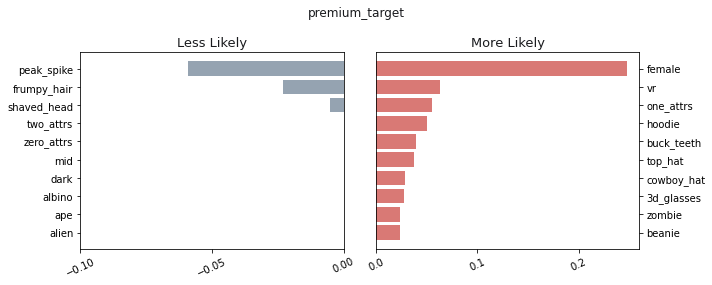

In [28]:
negative_features, negative_coeffs, positive_features, positive_coeffs = find_most_important_features(X_train, lr, n=10)
plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, 'premium_target')


In [29]:
master['date'] = pd.to_datetime(master['date'])


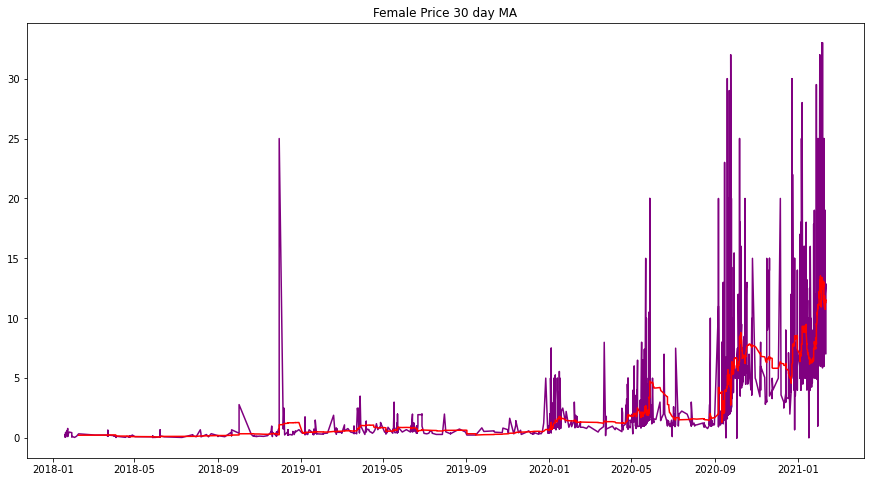

In [30]:
female_df = master[master['female']==1]
female_df.set_index('date', inplace=True)
plt.figure(figsize = (15, 8))
plt.plot(female_df['eth_amount'][500:], color = 'purple')
plt.plot(female_df['eth_amount'][500:].rolling(30).mean(), color = 'red')
plt.title('Female Price 30 day MA');

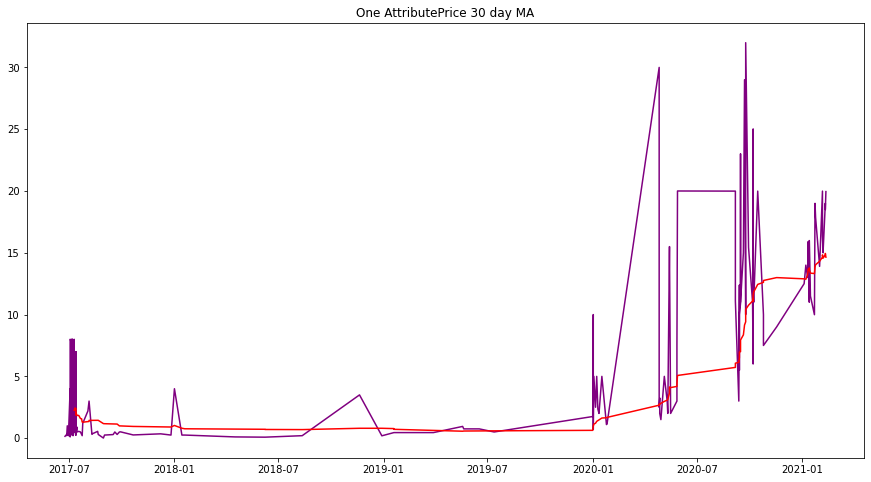

In [31]:
one_attr_df = master[master['one_attrs']==1]
one_attr_df.set_index('date', inplace=True)
plt.figure(figsize = (15, 8))
plt.plot(one_attr_df['eth_amount'], color = 'purple')
plt.plot(one_attr_df['eth_amount'].rolling(30).mean(), color = 'red')
plt.title('One AttributePrice 30 day MA');

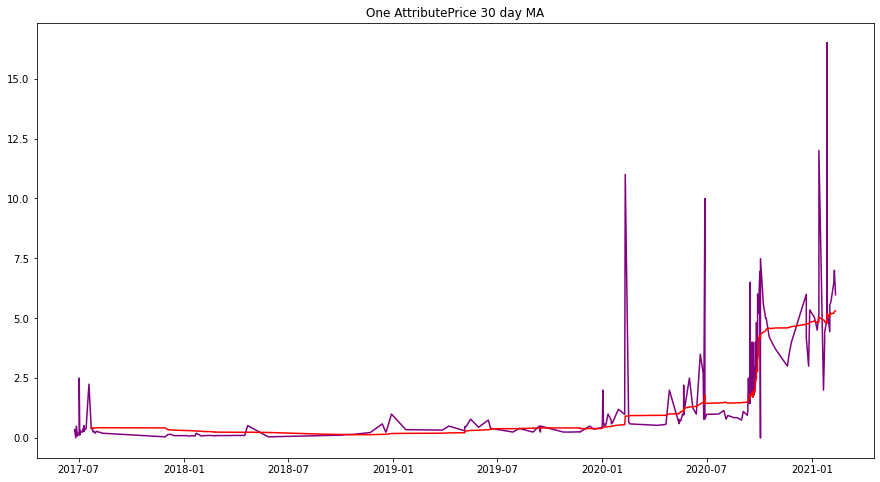

In [32]:
peak_spike_df = master[master['peak_spike']==1]
peak_spike_df.set_index('date', inplace=True)
plt.figure(figsize = (15, 8))
plt.plot(peak_spike_df['eth_amount'], color = 'purple')
plt.plot(peak_spike_df['eth_amount'].rolling(30).mean(), color = 'red')
plt.title('One AttributePrice 30 day MA');

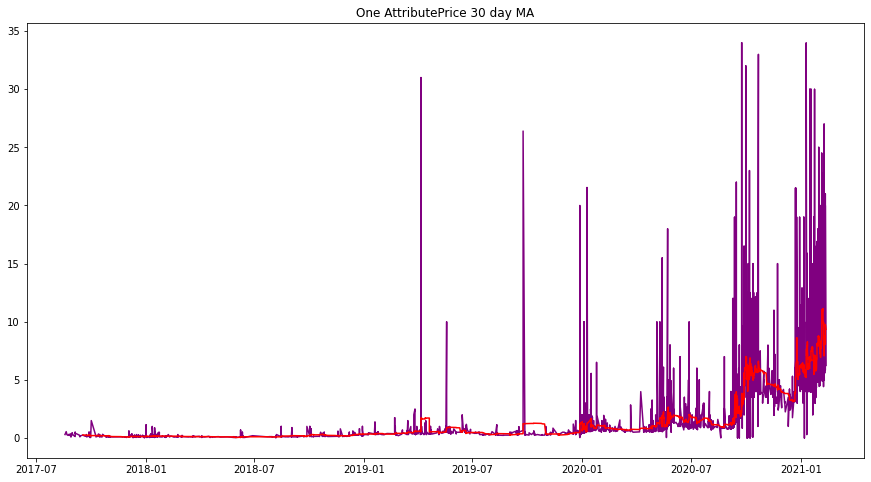

In [33]:
male_df = master[master['male']==1]
male_df.set_index('date', inplace=True)
plt.figure(figsize = (15, 8))
plt.plot(male_df['eth_amount'][500:], color = 'purple')
plt.plot(male_df['eth_amount'][500:].rolling(30).mean(), color = 'red')
plt.title('One AttributePrice 30 day MA');

In [34]:
test_preds = lr.predict(Z_test)

In [35]:
test_preds.mean()

1.0

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()

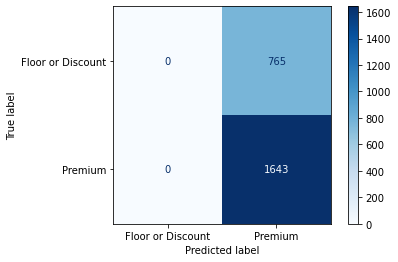

In [37]:
plot_confusion_matrix(lr, Z_test, y_test, cmap='Blues', display_labels=[f'Floor or Discount', 'Premium'])


model isn't making any negative predictions because of how imbalanced it is 
I want to try a random forest model

## Random Forest 

In [123]:

rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .23, random_state=42)

# set param grid
params = {
    'n_estimators' : [90, 100, 110],
    'min_samples_split' : [5, 8,10],
    'max_depth' : [99, 100, 101],
    'class_weight' : ['balanced', 'balanced_subsample'],
    'min_samples_leaf' : [3,5,71], 
    'max_features' : [9,10, 20]
    

}

#gridsearch
grid = GridSearchCV(
    rf, param_grid=params, cv=10, verbose=2, 
)

t0 = time.time()

# fit grid
grid.fit(X_train, y_train)

print(f' This cell took {time.time() - t0} seconds to run')


Fitting 10 folds for each of 486 candidates, totalling 4860 fits
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5

[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weigh

[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=bal

[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END class_we

[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END clas

[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_

[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END

[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END clas

[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] E

[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s

[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END clas

[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END clas

[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] E

[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] E

[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END clas

[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] E

[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END clas

[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END

[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV

[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END cla

[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END clas

[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] E

[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV]

[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[

[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] E

[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] E

[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s

[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s

[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END clas

[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] E

[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END clas

[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] E

[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END

[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END c

[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] 

[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END class_weight=balanced, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] E

[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END clas

[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] E

[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END 

[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.2s


[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samp

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=3, mi

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=5, min_sampl

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_sam

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=9, min_samples_leaf=71, m

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, m

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_lea

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=5, m

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=10, min_samples_lea

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=5, n_estimators=110; total time=   1.0s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_s

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   1.0s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_lea

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=5, m

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_lea

[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=99, max_features=20, min_samples_

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_sam

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, m

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=5, m

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_lea

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=9, min_sampl

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3,

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_le

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samp

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=10, mi

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=3

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, 

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_le

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samp

[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=100, max_features=20, mi

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=3, min

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_sam

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=5, m

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_lea

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=9, min_sampl

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_le

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5,

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_le

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samp

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=10, mi

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_le

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5,

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_le

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=5, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samp

[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, min_samples_leaf=71, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=101, max_features=20, mi

In [127]:
print(f'Cross Validation Score: {(grid.score(X_train, y_train))*100}%')

Cross Validation Score: 74.26351570087407%


In [129]:
grid.score(X_test, y_test)

0.6180931744312026

In [130]:
grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 100,
 'max_features': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 90}

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42, stratify=y)


rf = RandomForestClassifier(class_weight='balanced_subsample', 
                           max_depth=100, 
                           min_samples_split=10, 
                           n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.8135683760683761

In [86]:
rf.score(X_test, y_test)

0.6025747508305648

In [131]:
rf = RandomForestClassifier(class_weight='balanced_subsample', 
                           max_depth=100, 
                           min_samples_split=10, 
                           n_estimators=90, 
                           min_samples_leaf=3, 
                           max_features=20)
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.7449012625445128

In [132]:
rf.score(X_test, y_test)

0.6202600216684724

In [134]:
test_preds = rf.predict(X_test)

In [135]:
feature_importances = pd.DataFrame((X_train.columns, rf.feature_importances_)).T.rename(columns={0:'feature', 1:'coefficient'}).set_index('feature').sort_values(by='coefficient')
feature_importances

,coefficient
feature,
seven_attrs,0.0
alien,0.000032
six_attrs,0.000188
choker,0.000477
zero_attrs,0.001071
...,...
two_attrs,0.025859
three_attrs,0.027205
dark,0.03403


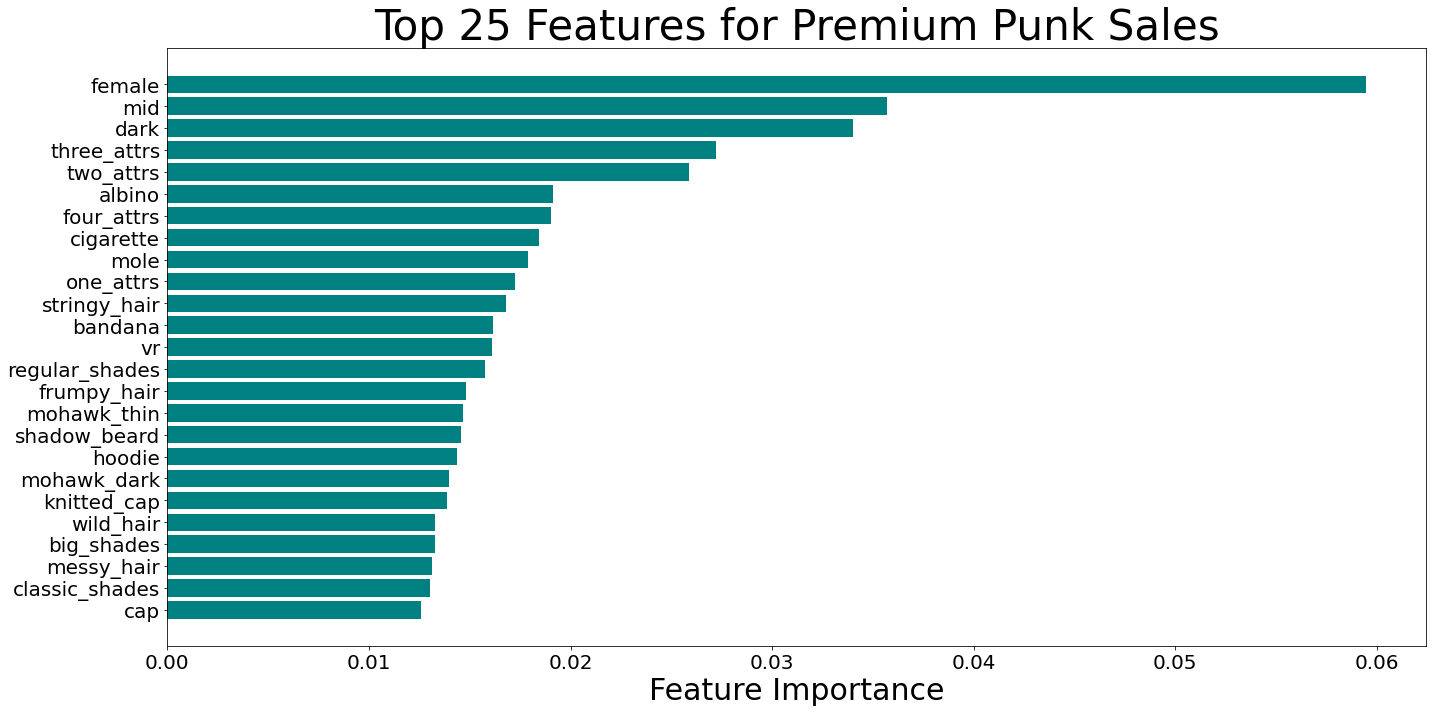

In [136]:
weights = feature_importances['coefficient'].tail(25)
labels = weights.index

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = 'teal')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Feature Importance', fontsize=30)
plt.title(f'Top 25 Features for Premium Punk Sales', fontsize=42)
plt.tight_layout()

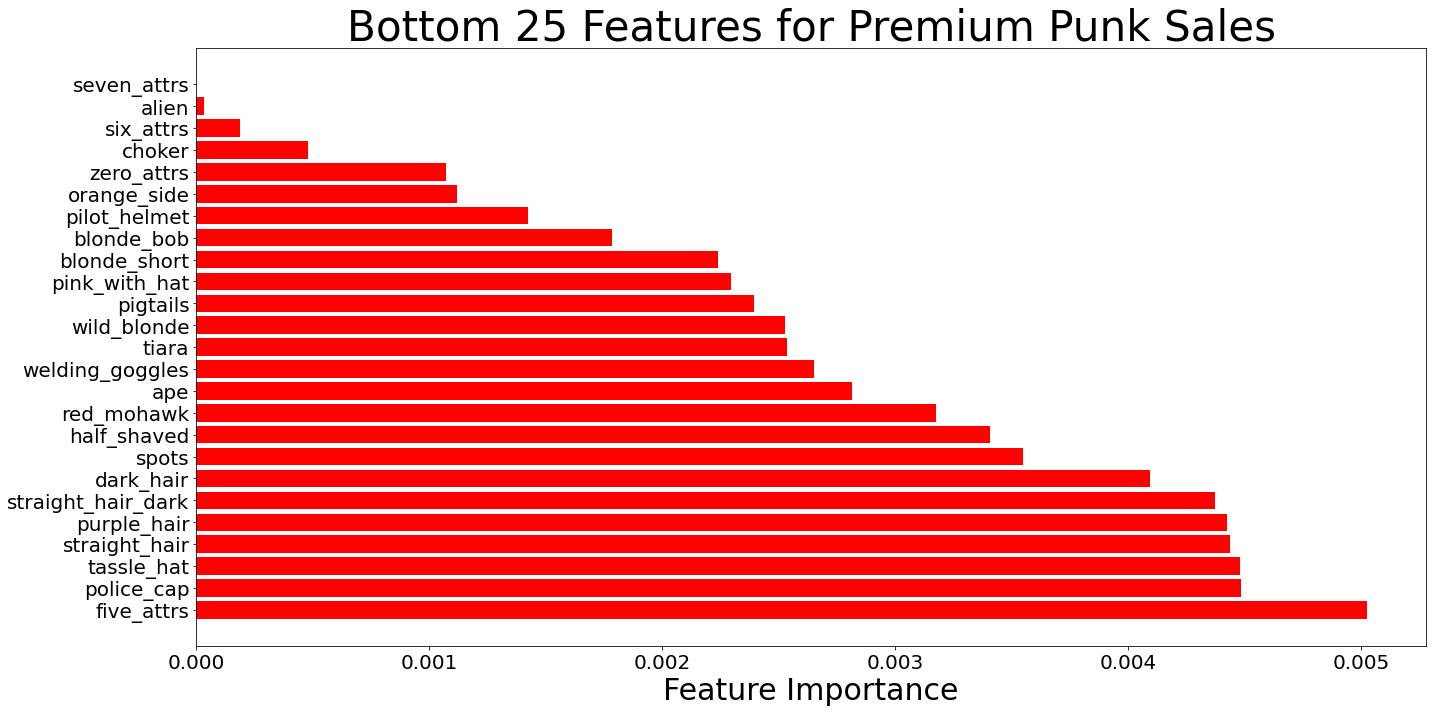

In [137]:
weights = feature_importances['coefficient'].sort_values(ascending=False).tail(25)
labels = weights.index

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = 'red')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Feature Importance', fontsize=30)
plt.title(f'Bottom 25 Features for Premium Punk Sales', fontsize=42)
plt.tight_layout()

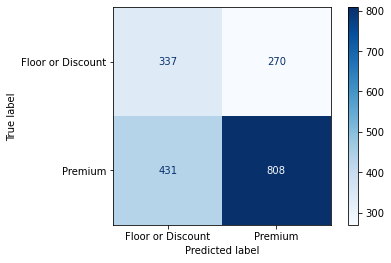

In [138]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', display_labels=[f'Floor or Discount', 'Premium'])


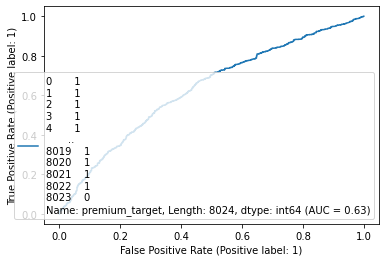

In [139]:
plot_roc_curve(rf, X_test, y_test, name=y)


In [140]:
roc_auc_score(y_test, test_preds)

0.6036641389865081

In [141]:
tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()


In [144]:
sensitivity = tp / (tp + fn)
print(f'Sensitivity: {sensitivity}')

Sensitivity: 0.6521388216303471


## XG Boost

In [111]:
from xgboost import XGBClassifier, plot_importance

In [99]:
xgb_cla = XGBClassifier()
xgb_cla.fit(X_train, y_train)

C:\Users\tsuts\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
xgb_cla.score(X_train, y_train)

0.7519586894586895

In [101]:
xgb_cla.score(X_test, y_test)

0.6528239202657807

In [102]:
y_pred = xgb_cla.predict(X_test)
predictions = [round(value) for value in y_pred]

In [103]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
specificity

0.16993464052287582

In [104]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.28%


In [105]:
precision = precision_score(y_test, predictions)
print("Precision: %.2f%%" % (precision * 100.0))

Precision: 69.43%


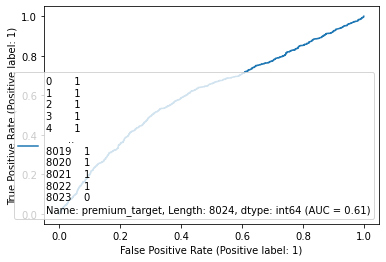

In [106]:
plot_roc_curve(xgb_cla, X_test, y_test, name=y)


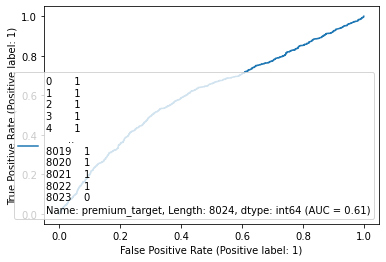

In [107]:
plot_roc_curve(xgb_cla, X_test, y_test, name=y)

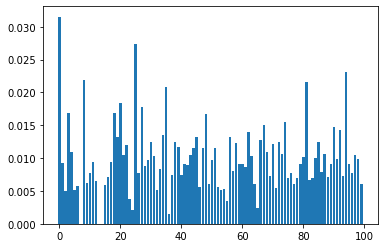

In [109]:
plt.bar(range(len(xgb_cla.feature_importances_)), xgb_cla.feature_importances_)
plt.show()

<Figure size 1440x720 with 0 Axes>

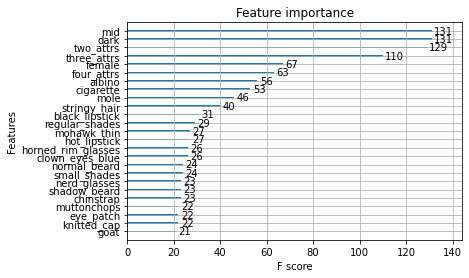

In [119]:
plt.figure(figsize=(20,10))

plot_importance(xgb_cla, max_num_features=25)
plt.show()

## Logistic Regression with KMeans Clusters


In [618]:
features = ['female','male', 'alien', 'ape', 'zombie', 'albino', 'dark', 'light',
 'mid', 'zero_attrs', 'one_attrs', 'two_attrs', 'three_attrs', 'four_attrs',
 'five_attrs', 'six_attrs', 'seven_attrs', 'scarcity_score', 'cap_forward',
 'do-rag', 'cap', 'cowboy_hat','headband', 'bandana', 'fedora', 'goat', 'police_cap', 'spots',
 'hoodie', 'gold_chain', 'top_hat', 'earring', 'knitted_cap', 'purple_hair', 'front_beard_dark',
 'front_beard', 'vampire_hair', 'normal_beard_black', 'shaved_head', 'peak_spike', 'luxurious_beard',
 'mole', 'chinstrap','wild_hair', 'mustache', 'normal_beard', 'mohawk_thin', 'shadow_beard', 'mohawk_dark',
 'mohawk', 'crazy_hair', 'stringy_hair', 'frumpy_hair', 'messy_hair', 'handlebars', 'rosy_cheeks', 'choker', 'pilot_helmet',
 'tiara', 'orange_side','beanie', 'welding_goggles', 'pigtails','pink_with_hat', 'blonde_short','wild_white_hair', 'straight_hair_blonde',
'wild_blonde', 'half_shaved', 'blonde_bob', 'red_mohawk', 'clown_hair_green', 'straight_hair_dark', 'dark_hair',
 'silver_chain', 'straight_hair', 'medical_mask', 'tassle_hat', 'big_beard', 'purple_eye_shadow', 'blue_eye_shadow',
 'green_eye_shadow', 'pipe', 'vape', 'muttonchops', 'vr', 'clown_nose', 'clown_eyes_green', 'clown_eyes_blue',
 '3d_glasses', 'classic_shades', 'regular_shades','small_shades', 'cigarette', 'eye_patch', 'nerd_glasses',
 'big_shades', 'horned_rim_glasses', 'buck_teeth', 'hot_lipstick', 'purple_lipstick', 'black_lipstick', 'frowm', 'smile', 
           'kmeans_clusters']

X = master[features].drop(columns=['male', 'light', 'earring', 'scarcity_score']) 
y = master['premium_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)


lr = LogisticRegression()

# scale data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

# set param grid
params = {
'penalty' : ['l1','l2'], 
'C' : [.01],
'solver' : ['liblinear', 'saga'],
'max_iter' : [100, 1000],
'class_weight' : [{1:0, 1:3}, {1:0, 1:5}, {1:0, 1:1}]
}

#gridsearch
grid = GridSearchCV(
    lr, param_grid=params, cv=10, verbose=2, 
)

# fit grid
grid.fit(Z_train, y_train)



Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 3}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weigh

[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 5}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] 

[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight={1: 1}, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, class_weight=

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01], 'class_weight': [{1: 3}, {1: 5}, {1: 1}],
                         'max_iter': [100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [619]:
grid.best_score_

0.6971449993025527

In [620]:
lr = LogisticRegression(C=.01, class_weight={1:3}, max_iter=100, penalty='l1', solver='liblinear')
lr.fit(Z_train,y_train)

LogisticRegression(C=0.01, class_weight={1: 3}, penalty='l1',
                   solver='liblinear')

In [621]:
lr.score(Z_train, y_train)

0.6971449897368912

In [622]:
lr.score(Z_test, y_test)

0.6923411662315057

## Linear Regression using modified target 

Rather than using a binary target, I can create a column that represents the % away from the floor price and run a linear regression

In [126]:
master.head(20)

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,...,big_shades,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters
0,Sold,2017-06-24,9131,0.0,0.15,46,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,1,0,0,3.263422e-05,13
1,Sold,2017-06-24,4509,0.0,0.20,61,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,0,0,0,6.555547e-05,46
2,Sold,2017-06-24,4445,0.0,0.35,107,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,0,0,0,7.401819e-05,2
3,Sold,2017-06-24,5921,0.0,0.36,110,0.01,9.498571,1.100,0.01,...,0,1,0,0,0,0,0,0,1.483252e-04,56
4,Sold,2017-06-24,8142,0.0,0.30,91,0.01,9.498571,1.100,0.01,...,0,0,0,0,1,0,0,0,4.067040e-06,52
5,Sold,2017-06-24,9926,2.0,0.01,0,0.01,9.498571,1.100,0.01,...,0,0,0,1,0,0,0,0,1.586131e-05,59
6,Sold,2017-06-24,1376,0.0,0.01,1,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,0,0,0,2.483254e-05,8
7,Sold,2017-06-24,5546,0.0,0.10,30,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,0,0,0,9.670447e-05,14
8,Sold,2017-06-24,1416,1.0,0.30,91,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,0,0,0,5.990849e-05,6
9,Sold,2017-06-24,1050,0.0,0.34,102,0.01,9.498571,1.100,0.01,...,0,0,0,0,0,0,0,0,9.311232e-05,49


In [128]:
# create a column that has the % from floor price
delta = [((master['eth_amount'][i] - master['floor_price'][i])/master['floor_price'][i]) for i in master.index]
master['delta'] = delta

In [137]:
master.tail(50)

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,...,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters,delta
7974,Sold,2021-02-10,8511,4.0,18.50,32794,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,6.929961e-06,23,2.303571
7975,Sold,2021-02-10,4689,1.0,8.00,14238,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,1.828552e-04,33,0.428571
7976,Sold,2021-02-10,3249,1.0,7.50,13046,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,3.208782e-07,10,0.339286
7977,Sold,2021-02-10,6863,1.0,12.49,22660,5.60,18.943253,11.000,5.60,...,0,0,1,0,0,0,0,5.108333e-06,47,1.230357
7978,Sold,2021-02-10,7752,1.0,8.99,15613,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,1.690329e-05,51,0.605357
7979,Sold,2021-02-10,7791,1.0,8.50,14786,5.60,18.943253,11.000,5.60,...,0,0,1,0,0,0,0,3.216010e-06,40,0.517857
7980,Sold,2021-02-10,9735,1.0,8.15,13966,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,3.315411e-06,14,0.455357
7981,Sold,2021-02-10,1798,1.0,9.00,16359,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,9.005136e-06,35,0.607143
7982,Sold,2021-02-10,5629,1.0,9.30,16146,5.60,18.943253,11.000,5.60,...,0,0,0,1,0,0,0,5.362042e-08,51,0.660714
7983,Sold,2021-02-10,5404,1.0,5.60,9665,5.60,18.943253,11.000,5.60,...,0,0,0,0,0,0,0,1.382740e-04,42,0.000000


In [138]:
master.set_index('date', inplace=True)

In [162]:
# run regression over certain time periods 
# perhaps market is more efficient over more recent years 
master = master.loc['2019-01-01':'2021-02-12']

In [163]:
master

,tx_type,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,floor_sale_target,...,horned_rim_glasses,buck_teeth,hot_lipstick,purple_lipstick,black_lipstick,frowm,smile,scarcity_score,kmeans_clusters,delta
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Sold,1846,0.0,0.50,66,0.43,3.600435,1.000,0.42,0,...,0,0,0,0,0,0,0,2.465665e-05,12,0.162791
2020-01-01,Sold,273,0.0,2.00,261,0.43,3.600435,1.000,0.42,0,...,0,0,0,0,0,0,0,8.781961e-05,35,3.651163
2020-01-01,Sold,6281,1.0,0.50,66,0.43,3.600435,1.000,0.42,0,...,0,0,0,0,1,0,0,2.902733e-06,51,0.162791
2020-01-01,Sold,6498,4.0,1.00,130,0.43,3.600435,1.000,0.42,0,...,0,0,1,0,0,0,0,4.954201e-09,42,1.325581
2020-01-01,Sold,7826,0.0,0.50,64,0.43,3.600435,1.000,0.42,0,...,0,0,0,0,0,0,0,9.108320e-05,52,0.162791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,Sold,2417,0.0,6.99,12247,2.81,48.634911,15.245,5.84,0,...,0,0,0,0,0,0,0,3.733688e-06,13,1.487544
2021-02-11,Sold,5614,2.0,5.90,10544,2.81,48.634911,15.245,5.84,0,...,0,0,0,0,0,1,0,2.172583e-05,52,1.099644
2021-02-11,Sold,4041,0.0,20.00,34457,2.81,48.634911,15.245,5.84,0,...,0,0,0,0,0,0,0,2.832635e-05,38,6.117438


In [164]:
features = ['female','male', 'alien', 'ape', 'zombie', 'albino', 'dark', 'light',
 'mid', 'zero_attrs', 'one_attrs', 'two_attrs', 'three_attrs', 'four_attrs',
 'five_attrs', 'six_attrs', 'seven_attrs', 'scarcity_score', 'cap_forward',
 'do-rag', 'cap', 'cowboy_hat','headband', 'bandana', 'fedora', 'goat', 'police_cap', 'spots',
 'hoodie', 'gold_chain', 'top_hat', 'earring', 'knitted_cap', 'purple_hair', 'front_beard_dark',
 'front_beard', 'vampire_hair', 'normal_beard_black', 'shaved_head', 'peak_spike', 'luxurious_beard',
 'mole', 'chinstrap','wild_hair', 'mustache', 'normal_beard', 'mohawk_thin', 'shadow_beard', 'mohawk_dark',
 'mohawk', 'crazy_hair', 'stringy_hair', 'frumpy_hair', 'messy_hair', 'handlebars', 'rosy_cheeks', 'choker', 'pilot_helmet',
 'tiara', 'orange_side','beanie', 'welding_goggles', 'pigtails','pink_with_hat', 'blonde_short','wild_white_hair', 'straight_hair_blonde',
'wild_blonde', 'half_shaved', 'blonde_bob', 'red_mohawk', 'clown_hair_green', 'straight_hair_dark', 'dark_hair',
 'silver_chain', 'straight_hair', 'medical_mask', 'tassle_hat', 'big_beard', 'purple_eye_shadow', 'blue_eye_shadow',
 'green_eye_shadow', 'pipe', 'vape', 'muttonchops', 'vr', 'clown_nose', 'clown_eyes_green', 'clown_eyes_blue',
 '3d_glasses', 'classic_shades', 'regular_shades','small_shades', 'cigarette', 'eye_patch', 'nerd_glasses',
 'big_shades', 'horned_rim_glasses', 'buck_teeth', 'hot_lipstick', 'purple_lipstick', 'black_lipstick', 'frowm', 'smile']

X = master[features].drop(columns=['male', 'light', 'earring', 'scarcity_score']) 
y = master['delta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

In [41]:
lr.score(Z_train, y_train)

0.11925568182167023

In [42]:
lr.score(Z_test, y_test)

0.09934594068732217

## Random Forest Regressor

In [57]:
features = ['female','male', 'alien', 'ape', 'zombie', 'albino', 'dark', 'light',
 'mid', 'cap_forward',
 'do-rag', 'cap', 'cowboy_hat','headband', 'bandana', 'fedora', 'goat', 'police_cap', 'spots',
 'hoodie', 'gold_chain', 'top_hat', 'earring', 'knitted_cap', 'purple_hair', 'front_beard_dark',
 'front_beard', 'vampire_hair', 'normal_beard_black', 'shaved_head', 'peak_spike', 'luxurious_beard',
 'mole', 'chinstrap','wild_hair', 'mustache', 'normal_beard', 'mohawk_thin', 'shadow_beard', 'mohawk_dark',
 'mohawk', 'crazy_hair', 'stringy_hair', 'frumpy_hair', 'messy_hair', 'handlebars', 'rosy_cheeks', 'choker', 'pilot_helmet',
 'tiara', 'orange_side','beanie', 'welding_goggles', 'pigtails','pink_with_hat', 'blonde_short','wild_white_hair', 'straight_hair_blonde',
'wild_blonde', 'half_shaved', 'blonde_bob', 'red_mohawk', 'clown_hair_green', 'straight_hair_dark', 'dark_hair',
 'silver_chain', 'straight_hair', 'medical_mask', 'tassle_hat', 'big_beard', 'purple_eye_shadow', 'blue_eye_shadow',
 'green_eye_shadow', 'pipe', 'vape', 'muttonchops', 'vr', 'clown_nose', 'clown_eyes_green', 'clown_eyes_blue',
 '3d_glasses', 'classic_shades', 'regular_shades','small_shades', 'cigarette', 'eye_patch', 'nerd_glasses',
 'big_shades', 'horned_rim_glasses', 'buck_teeth', 'hot_lipstick', 'purple_lipstick', 'black_lipstick', 'frowm', 'smile']

X = master[features]
y = master['scarcity_score']

In [58]:

rf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .23, random_state=42)

# set param grid
params = {
    'n_estimators' : [90, 100, 110],
    'min_samples_split' : [5, 8,10],
    'max_depth' : [99, 100, 101],
    'min_samples_leaf' : [3,5,71], 
    'max_features' : [9,10, 20]
    

}

#gridsearch
grid = GridSearchCV(
    rf, param_grid=params, cv=10, verbose=2, 
)

t0 = time.time()

# fit grid
grid.fit(X_train, y_train)

print(f' This cell took {time.time() - t0} seconds to run')

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=99, max_features=9, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] EN

KeyboardInterrupt: 

In [59]:
rf = RandomForestRegressor( 
                           max_depth=100, 
                           min_samples_split=8, 
                           n_estimators=100, 
                           min_samples_leaf=3, 
                           max_features=10)
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.2675263114049604

In [80]:
master['premium_target'].value_counts(normalize=True)

1    0.682203
0    0.317797
Name: premium_target, dtype: float64